# Field Plots Related to Gravity

Here are some vector field plots related to gravity, 
specifically the Earth's gravitational field.

Note: The distance unit for the x- and y-axes for each
plot is in earth radii (notated in equations as $r^\prime$).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

plt.style.use("dark_background")
cmap = "viridis"

g = 9.80665  # m/s/s
earth_radius = 6371000  # in meters
# G = 6.67430e-11  # N m^2/kg^2
# mass_of_earth = 5.97237e24  # in kilograms

# For saving multiple colormap plots:
# cmaps = ["cividis", "plasma", "inferno", "viridis"]
# for cmap in cmaps:

## The Acceleration of Earth's gravity

Note that the vector arrows are plotted on their tips 
in order for the vectors closest to Earth to be fully
visible.

C:\Users\Zach\AppData\Local\Temp/ipykernel_2136/2272388599.py:10: RuntimeWarning: invalid value encountered in true_divide
  u = -x/r
C:\Users\Zach\AppData\Local\Temp/ipykernel_2136/2272388599.py:11: RuntimeWarning: invalid value encountered in true_divide
  v = -y/r
C:\Users\Zach\AppData\Local\Temp/ipykernel_2136/2272388599.py:12: RuntimeWarning: divide by zero encountered in true_divide
  mag = g/(r*r)


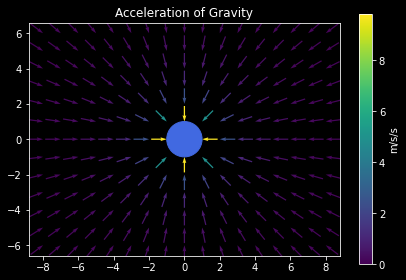

In [2]:
# Set up coordinates and values.
x_max = 8
y_max = 6
x, y = np.meshgrid(
    np.linspace(-x_max, x_max, 2*x_max+1), 
    np.linspace(-y_max, y_max, 2*y_max+1)
)

r = np.hypot(x, y)
u = -x/r
v = -y/r
mag = g/(r*r)

# Plot
earth = plt.Circle((0, 0), 1, color="royalblue")
ax = plt.subplot()

plt.quiver(
    x, y, 
    u, v, 
    mag, 
    cmap = cmap,
    norm = colors.Normalize(vmin=0, vmax=g),
    pivot = "tip",
    scale = 20,
)
ax.add_patch(earth)
ax.set_aspect('equal', 'box')
ax.set_xticks(np.arange(-x_max, x_max+1, 2))
plt.title("Acceleration of Gravity")
plt.colorbar(label="m/s/s")
plt.tight_layout()
# plt.savefig(f"./svg/earth_gravity_{cmap}.svg", dpi=600)

plt.show()

## Divergence of the gravitational acceleration field

The divergence of a vector field is given by $\nabla \cdot \vec{V}$, 
which gives a scalar field that indicates the outward flux of the vector
field at each point. Because the acceleration of gravity points inward, i.e.
toward Earth, the divergence is negative.

C:\Users\Zach\AppData\Local\Temp/ipykernel_2136/1715451524.py:10: RuntimeWarning: divide by zero encountered in true_divide
  mag = -3*g/(r**3)


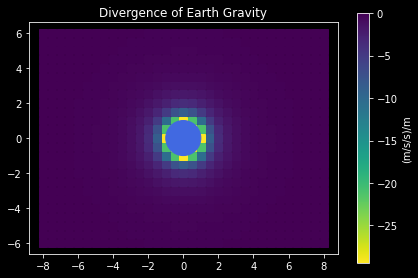

In [3]:
# Set up coordinates and values.
x_max = 8
y_max = 6
x, y = np.meshgrid(
    np.linspace(-x_max, x_max, 4*x_max+1), 
    np.linspace(-y_max, y_max, 4*y_max+1)
)

r = np.hypot(x, y)
mag = -3*g/(r**3)
vmin = -3*g

# Plot
earth = plt.Circle((0, 0), 1, color="royalblue")
ax = plt.subplot()
plt.scatter(
    x, y, 
    s = 62, 
    c = mag,
    cmap = cmap + "_r",
    vmin = vmin,
    vmax = 0,
    marker = "s",
    plotnonfinite = False,
)
ax.add_patch(earth)
ax.set_aspect('equal', 'box')
ax.set_xticks(np.arange(-8, 9, 2))
plt.title("Divergence of Earth Gravity")
plt.colorbar(label="(m/s/s)/m")
plt.tight_layout()
# plt.savefig(f"./svg/divergence_of_earth_gravity_{cmap}.svg", dpi=600)

plt.show()

## Velocity needed to orbit Earth based on position

This field shows the velocity needed for an object to 
orbit the Earth. Vector arrows are plotted to the center of the arrow.
This velocity is calculated from the formula for centripital acceleration, 
$a_c = \frac{v^2}{r} = \frac{v^2}{r_e(r^\prime)}$, and setting it equal to the gravitational acceleration, 
$a_g = \frac{Gm_e}{r^2} = \frac{g}{(r^\prime)^2}$

C:\Users\Zach\AppData\Local\Temp/ipykernel_2136/4209419697.py:8: RuntimeWarning: invalid value encountered in true_divide
  u = -y/r
C:\Users\Zach\AppData\Local\Temp/ipykernel_2136/4209419697.py:9: RuntimeWarning: invalid value encountered in true_divide
  v = x/r
C:\Users\Zach\AppData\Local\Temp/ipykernel_2136/4209419697.py:11: RuntimeWarning: divide by zero encountered in true_divide
  mag = np.sqrt(g*earth_radius/r)


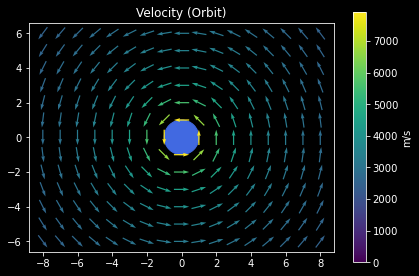

In [4]:
x_max = 8
y_max = 6
x, y = np.meshgrid(
    np.linspace(-x_max, x_max, 2*x_max+1), 
    np.linspace(-y_max, y_max, 2*y_max+1)
)
r = np.hypot(x, y)
u = -y/r
v = x/r

mag = np.sqrt(g*earth_radius/r)
vmax = np.sqrt(g*earth_radius)

# Plot
earth = plt.Circle((0, 0), 1, color="royalblue")
ax = plt.subplot()
ax.add_patch(earth)
plt.quiver(
    x, y, 
    u, v, 
    mag, 
    cmap = cmap,
    norm = colors.Normalize(vmin=0, vmax=vmax),
    pivot = "mid",
    scale = 20,
)
ax.set_aspect('equal', 'box')
ax.set_xticks(np.arange(-8, 9, 2))
plt.title("Velocity (Orbit)")
plt.colorbar(label="m/s")
plt.tight_layout()
# plt.savefig(f"./svg/earth_orbit_velocity_{cmap}.svg", dpi=600)

plt.show()

## Curl of the Orbital Velocity Field

The curl of a vector field is given by $\nabla \times \vec{V}$ and 
indicates the axis and magnitude of the circulation of the vector 
field at each point in the field. For this particular field, the 
axis for each point is the z-axis ($\hat{z}$) and diminishes from 
Earth proportional to $r^2$.

C:\Users\Zach\AppData\Local\Temp/ipykernel_2136/3808165647.py:8: RuntimeWarning: divide by zero encountered in true_divide
  mag = g*earth_radius/(2*r*r)*np.sqrt(r/(g*earth_radius))
C:\Users\Zach\AppData\Local\Temp/ipykernel_2136/3808165647.py:8: RuntimeWarning: invalid value encountered in multiply
  mag = g*earth_radius/(2*r*r)*np.sqrt(r/(g*earth_radius))


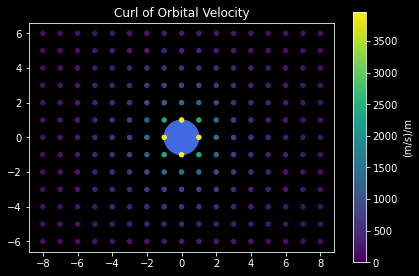

In [5]:
x_max = 8
y_max = 6
x, y = np.meshgrid(
    np.linspace(-x_max, x_max, 2*x_max+1), 
    np.linspace(-y_max, y_max, 2*y_max+1)
)
r = np.hypot(x, y)
mag = g*earth_radius/(2*r*r)*np.sqrt(r/(g*earth_radius))
vmax = g*earth_radius/2*np.sqrt(1/(g*earth_radius))

# Plot
earth = plt.Circle((0, 0), 1, color="royalblue")
ax = plt.subplot()
ax.add_patch(earth)
plt.scatter(
    x, y, 
    s = 20, 
    c = mag,
    cmap = cmap,
    vmin = 0,
    vmax = vmax,
    plotnonfinite = False,
)

ax.set_aspect('equal', 'box')
ax.set_xticks(np.arange(-8, 9, 2))
plt.title("Curl of Orbital Velocity")
plt.colorbar(label="(m/s)/m")
plt.tight_layout()
# plt.savefig(f"./svg/curl_of_earth_orbit_velocity_{cmap}.svg", dpi=600)

plt.show()